# PyTorch Workflow

In [1]:
import torch
from torch import nn # contain all about Nueral Netwrk
import matplotlib.pyplot as plt

#check Pytorch Version
torch.__version__

'2.2.1+cu121'

In [2]:
# creating known parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end , step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
#split data into training and testing set

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train),len(X_test), len(y_test)

(40, 40, 10, 10)

In [4]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c ="b", s=4, label="Training Data")
  plt.scatter(test_data, test_labels, c ="g", s=4, label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c ="r", s=4, label="Prediction")

  plt.legend(prop={"size":14});



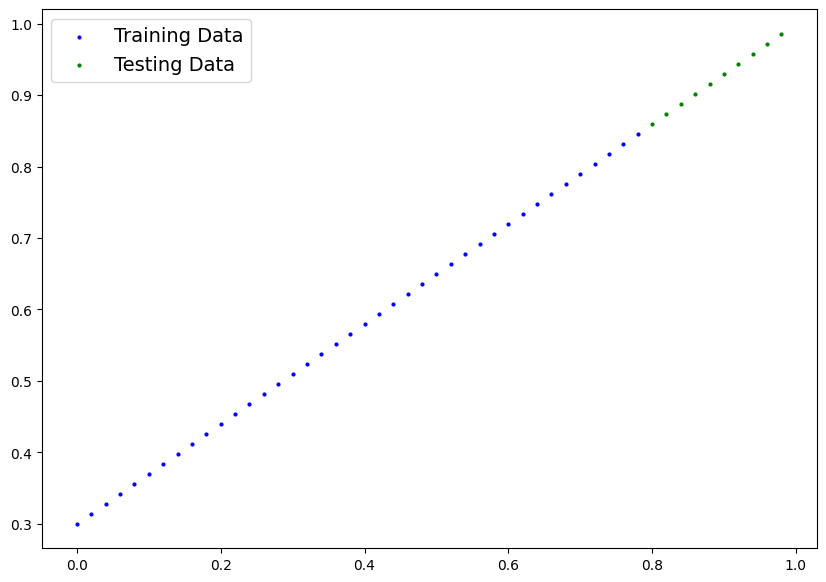

In [5]:
plot_predictions()

# OOP in Python

In [6]:
class Student:
  def __init__(self,name, age, gender, grade):
    self.name = name
    self.age = age
    self.gender = gender
    self.grade = grade

In [7]:
Student1=Student("Ali naeem",24, "M", "B")
Student1.name, Student1.age, Student1.gender, Student1.grade

('Ali naeem', 24, 'M', 'B')

In [8]:
class Student:
  specie = "Homosapiens"
  def __init__(self,name, age, gender, grade):
    self.name = name
    self.age = age
    self.gender = gender
    self.grade = grade

In [9]:
Student1=Student("Ali naeem",24, "M", "B")
Student1.specie

'Homosapiens'

In [10]:
Student1.age = 45
print(f"Updated age={Student1.age}")

Updated age=45


In [11]:
class Student:
  specie = "Homosapiens"
  def __init__(self,name, age, gender, grade):
    self.name = name
    self.age = age
    self.gender = gender
    self.grade = grade
  def __str__(self):
    return f"{self.name, self.age}"

In [12]:
Student3=Student("Khaild khan",27, "M", "A")

In [13]:
print(Student3)

('Khaild khan', 27)


## Inheritance

In [14]:
# Parent class
class Vehicle:
  def __init__(self, country, model):
    self.country, self.model

  def infor(self):
    print(self.country, self.model)


In [15]:
#child class
class Car(Vehicle):
  def __init__(self, country, model, num_doors):
    super().__init__(country, model)
    self.num_doors = num_doors

  def infor(self):
    super().infor()
    print(f"Number of Doors{self.num_doors}")

class Bike(Vehicle):
  def __init__(self, country, model, num_wheels):
    super().__init__(country, model)
    self.num_wheels = num_wheels



## Buidl Model
1 Frsts model

In [16]:
import torch
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))

  # forward
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [17]:
## Creating random seed
torch.manual_seed(42)

#create an instance of model
model_0 = LinearRegressionModel()

list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [20]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [21]:
# rememeber infernce is prefefred
with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

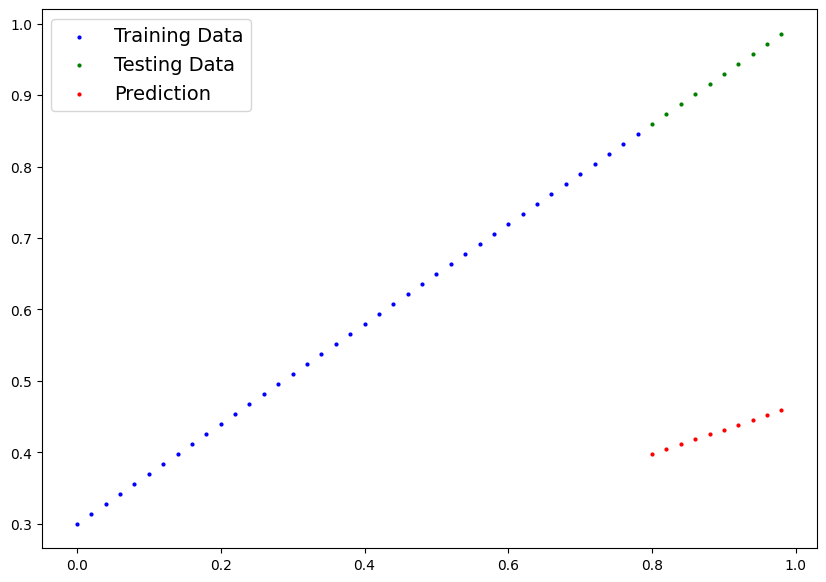

In [22]:
plot_predictions(predictions=y_preds)

In [23]:
# setup losss function
loss_fn = nn.L1Loss()

#optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01,)


In [24]:
loss_fn


L1Loss()

# Building Training Loop in Pytorch

In [25]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [26]:
import torch
torch.manual_seed(42)
epochs = 200

#track differnet values
epoch_count=[]
loss_values=[]
test_loss_values=[]

for epoch in range(epochs):

  model_0.train()

  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  print(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
  print(f"Epochs: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

  print(model_0.state_dict())


tensor(0.3129, grad_fn=<MeanBackward0>)
Epochs: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
tensor(0.3014, grad_fn=<MeanBackward0>)
Epochs: 1 | Loss: 0.3013603389263153 | Test Loss: 0.4675942063331604
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
tensor(0.2898, grad_fn=<MeanBackward0>)
Epochs: 2 | Loss: 0.28983935713768005 | Test Loss: 0.4541231691837311
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
tensor(0.2783, grad_fn=<MeanBackward0>)
Epochs: 3 | Loss: 0.2783183455467224 | Test Loss: 0.44065219163894653
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
tensor(0.2668, grad_fn=<MeanBackward0>)
Epochs: 4 | Loss: 0.26679736375808716 | Test Loss: 0.4271811842918396
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
tensor(0.2553, grad_fn=<MeanBackward0>)
Epochs: 5 | Loss: 0.2552763521671295 | Test L

In [27]:
type(loss_values)


list

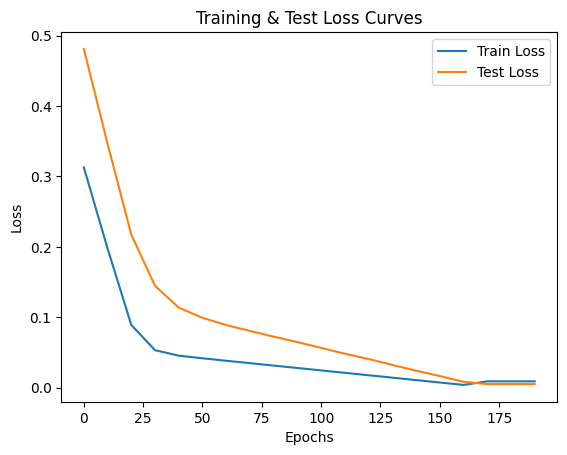

In [28]:
#plot the loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training & Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [29]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

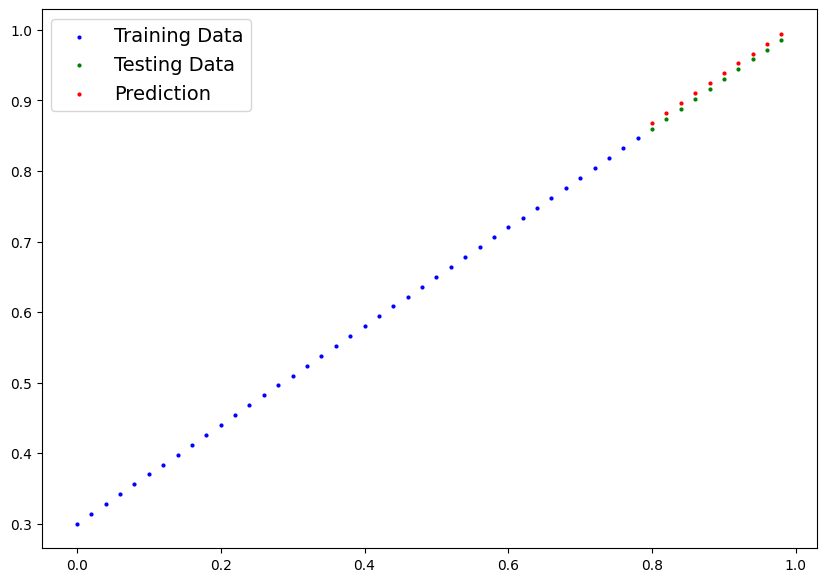

In [30]:
plot_predictions(predictions=y_preds_new)

In [31]:
#saving a model in Pytorch
model_0.state_dict()


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [32]:
# saving Pytorvh Model
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_Pytorch_workFLow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#SAVING THE MODEL DICT
print(f"Saving Model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)



Saving Model to:models/01_Pytorch_workFLow_model_0.pth


In [33]:
# saving Pytorvh Model in Pytorch folder of my Drive
from pathlib import Path

MODEL_PATH = Path("/content/drive/MyDrive/PyTorch")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_Pytorch_workFLow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#SAVING THE MODEL DICT
print(f"Saving Model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving Model to:/content/drive/MyDrive/PyTorch/01_Pytorch_workFLow_model_0.pth


In [34]:
checking_model=torch.load("/content/drive/MyDrive/PyTorch/01_Pytorch_workFLow_model_0.pth")


In [35]:
checking_model

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [36]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [37]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [38]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [39]:
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [40]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [41]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [42]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__


'2.2.1+cu121'

In [43]:
#setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using Device :{device}")

Using Device :cuda


#Data

In [44]:
#create some data
weight = 0.7
bias = 0.3

#create range

start = 0; end =1; step= 0.02

X=torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [45]:
#split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)



(40, 40, 10, 10)

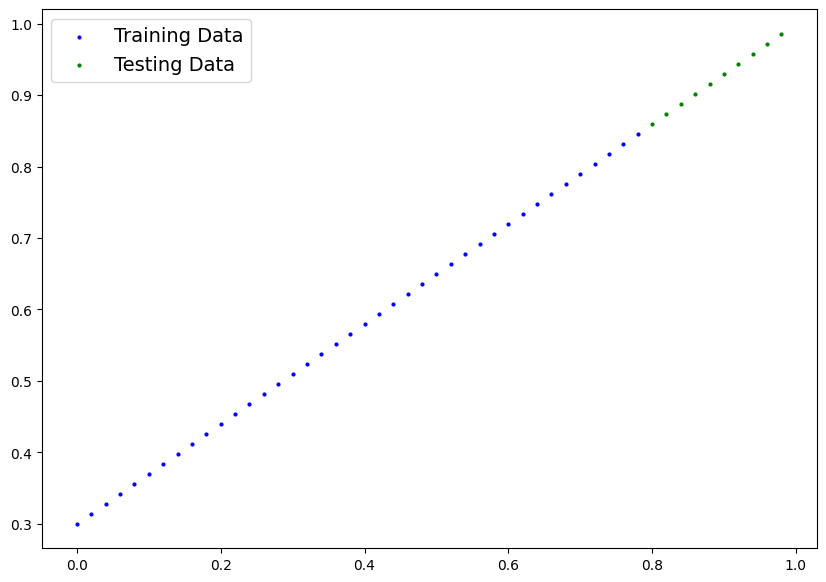

In [46]:
plot_predictions(X_train, y_train, X_test, y_test)

#Pytorch Linear Model

In [47]:
#creats some data
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # uSE nn.linear() for crreeatinf parametere automtically
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

#seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [48]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [49]:
next(model_1.parameters()).device

device(type='cpu')

In [50]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [51]:
#training
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [52]:
torch.manual_seed(42)

epochs = 200

#put data on target devvice

X_train = X_train.to(device)

y_train = y_train.to(device)

X_test = X_test.to(device)

y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #do the forward
  y_pred = model_1(X_train)
  #calcuaute the loss
  loss = loss_fn(y_pred, y_train)
  # optimzer zero grad
  optimizer.zero_grad()
  loss.backward()

  #optimzer step
  optimizer.step()

  #testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)
    if epoch%10==0:
      print(f"Epoch:{epoch} | Loss: {loss} | Test Loss:{test_loss}")




Epoch:0 | Loss: 0.5551779866218567 | Test Loss:0.5739762187004089
Epoch:10 | Loss: 0.439968079328537 | Test Loss:0.4392664134502411
Epoch:20 | Loss: 0.3247582018375397 | Test Loss:0.30455657839775085
Epoch:30 | Loss: 0.20954833924770355 | Test Loss:0.16984669864177704
Epoch:40 | Loss: 0.09433845430612564 | Test Loss:0.03513690456748009
Epoch:50 | Loss: 0.023886388167738914 | Test Loss:0.04784907028079033
Epoch:60 | Loss: 0.019956795498728752 | Test Loss:0.045803118497133255
Epoch:70 | Loss: 0.016517987474799156 | Test Loss:0.037530567497015
Epoch:80 | Loss: 0.013089174404740334 | Test Loss:0.02994490973651409
Epoch:90 | Loss: 0.009653178043663502 | Test Loss:0.02167237363755703
Epoch:100 | Loss: 0.006215683650225401 | Test Loss:0.014086711220443249
Epoch:110 | Loss: 0.00278724217787385 | Test Loss:0.005814164876937866
Epoch:120 | Loss: 0.0012645035749301314 | Test Loss:0.013801801018416882
Epoch:130 | Loss: 0.0012645035749301314 | Test Loss:0.013801801018416882
Epoch:140 | Loss: 0.0012

In [53]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [54]:
# turn the model into evaluation mode
model_1.eval()

#make predcition
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

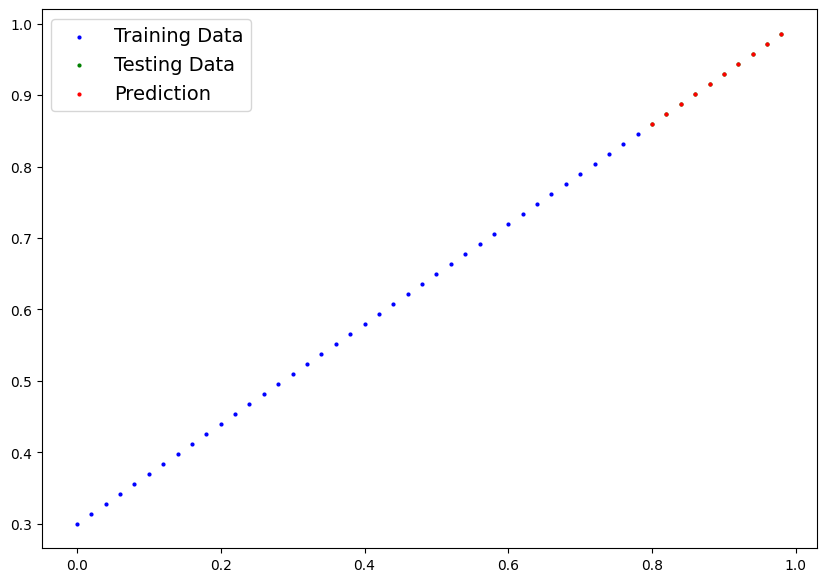

In [56]:
#check out model predcitions visually
plot_predictions(predictions=y_preds.cpu())

In [57]:
#saving and laoding trained mdoel
from pathlib import Path

MODEL_PATH = Path("/content/drive/MyDrive/PyTorch")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_Pytorch_workFLow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#SAVING THE MODEL DICT
print(f"Saving Model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving Model to:/content/drive/MyDrive/PyTorch/01_Pytorch_workFLow_model_1.pth


In [58]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [59]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [60]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [61]:
#load Pytorch model
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [63]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [64]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [65]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')